In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv', low_memory=False)
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

# Optionally, inspect the column causing issues
print(train_df['StateHoliday'].unique())


['0' 'a' 'b' 'c']


In [3]:
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

print(train_df.head())
print(store_df.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4     

In [4]:
print(train_df.isnull().sum())
print(store_df.isnull().sum())


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [5]:
df = pd.merge(train_df, store_df, on='Store', how='left')


In [6]:
df['Open'].fillna(1, inplace=True)


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [8]:
df['CompetitionOpen'] = 12 * (df['Year'] - df['CompetitionOpenSinceYear']) + (df['Month'] - df['CompetitionOpenSinceMonth'])
df['CompetitionOpen'].fillna(0, inplace=True)


In [9]:
df.drop(['Date', 'Customers', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


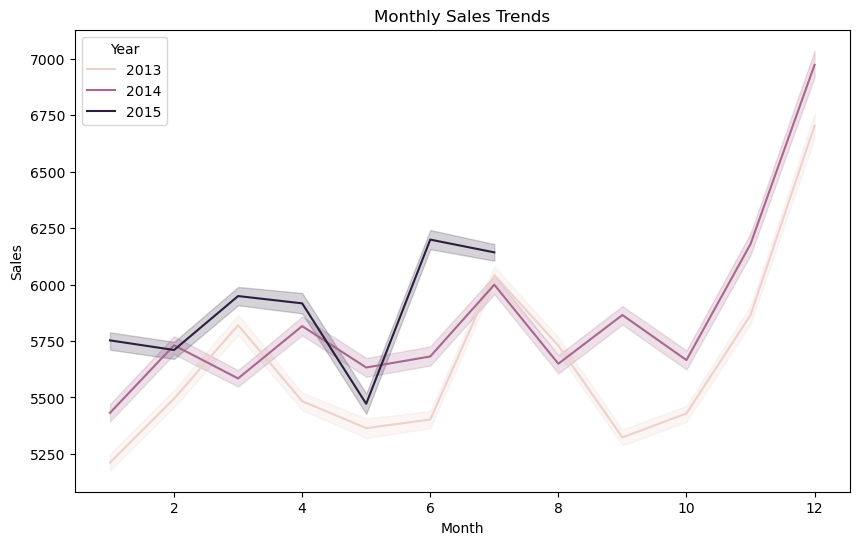

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Trends')
plt.show()


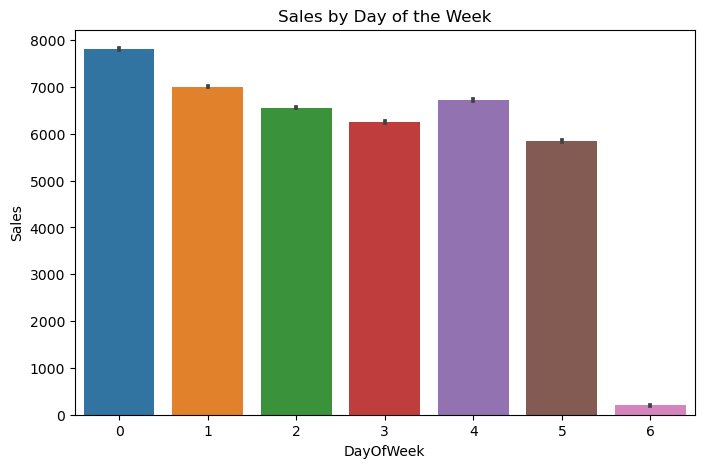

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='DayOfWeek', y='Sales')
plt.title('Sales by Day of the Week')
plt.show()


In [12]:
#Model Development
X = df.drop(['Sales'], axis=1)
y = df['Sales']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Inspect the first few rows of X_train and y_train
print("X_train sample:")
print(X_train.head())

print("\ny_train sample:")
print(y_train.head())

# Inspect the data types
print("\nData types in X_train:")
print(X_train.dtypes)

print("\nData types in y_train:")
print(y_train.dtypes)


X_train sample:
        Store  DayOfWeek  Open  Promo StateHoliday  SchoolHoliday StoreType  \
417683    344          6     0      0            0              0         a   
659402    108          6     0      0            0              0         d   
739873    299          4     1      0            0              0         d   
109671    402          4     1      0            0              0         c   
422541    742          2     1      1            0              0         d   

       Assortment  CompetitionDistance  Promo2    PromoInterval  Year  Month  \
417683          c                300.0       1  Jan,Apr,Jul,Oct  2014      6   
659402          c               2190.0       0              NaN  2013     11   
739873          c              38630.0       0              NaN  2013      9   
109671          c               5830.0       1  Jan,Apr,Jul,Oct  2015      4   
422541          c               4380.0       0              NaN  2014      6   

        Day  CompetitionOpen

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'a'

In [16]:
df = pd.get_dummies(df, columns=['StoreType', 'Assortment', 'StateHoliday'])
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column {col} contains non-numeric data.")
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)
X = df.drop(['Sales'], axis=1)
y = df['Sales']


Column PromoInterval contains non-numeric data.


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 505.9020271133788
Root Mean Squared Error (RMSE): 883.0315024669487


In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


R-squared: 0.9472746378214406


In [22]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RandomForestRegressor(random_state=42)

In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


MemoryError: Unable to allocate 6.51 MiB for an array with shape (852909, 1) and data type float64

In [24]:
sample_data = X_test.sample(1000, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sample_data)

shap.summary_plot(shap_values, sample_data)


MemoryError: Unable to allocate 6.51 MiB for an array with shape (853751, 1) and data type float64

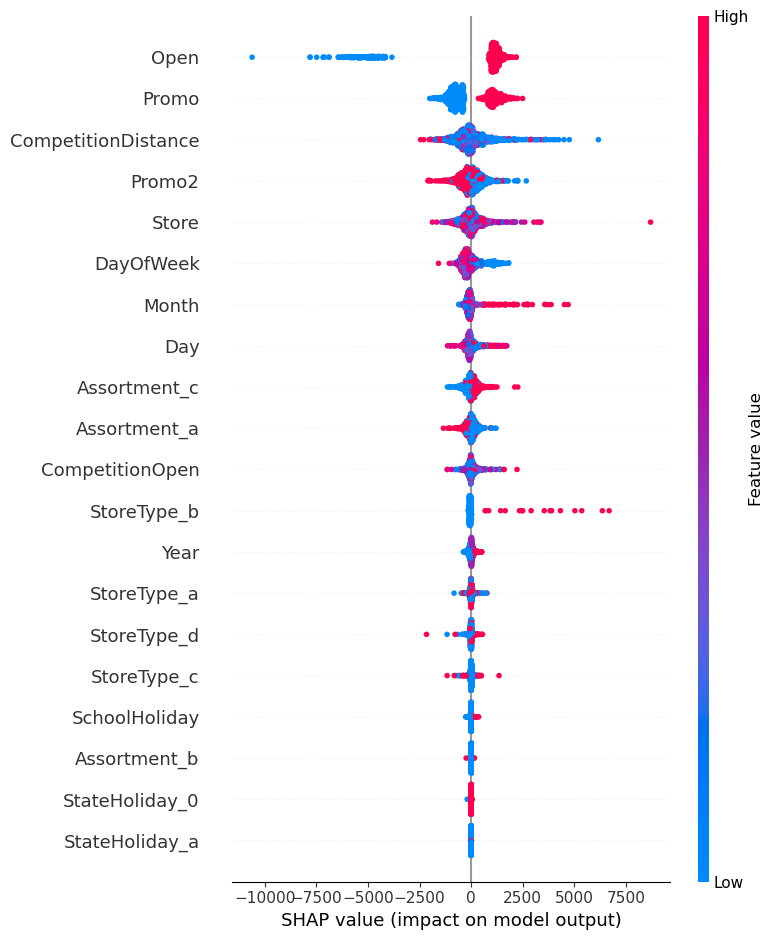

In [25]:
# Train a smaller model with fewer trees
small_model = RandomForestRegressor(n_estimators=10, random_state=42)
small_model.fit(X_train, y_train)

# Use SHAP with the smaller model
explainer = shap.TreeExplainer(small_model)
shap_values = explainer.shap_values(sample_data)

shap.summary_plot(shap_values, sample_data)


In [26]:
test_df = pd.merge(test_df, store_df, on='Store', how='left')
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['DayOfWeek'] = test_df['Date'].dt.dayofweek
test_df['CompetitionOpen'] = 12 * (test_df['Year'] - test_df['CompetitionOpenSinceYear']) + (test_df['Month'] - test_df['CompetitionOpenSinceMonth'])
test_df.fillna(0, inplace=True)
test_df.drop(['Date', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)


In [27]:
test_predictions = model.predict(test_df)
test_df['Sales'] = test_predictions


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Assortment
- Id
- StateHoliday
- StoreType
Feature names seen at fit time, yet now missing:
- Assortment_a
- Assortment_b
- Assortment_c
- StateHoliday_0
- StateHoliday_a
- ...


In [28]:
# Re-encode test data to match training data
test_df = pd.get_dummies(test_df)

# Align the test set columns with the training set
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)


In [30]:
# Make predictions using your trained model
test_predictions = model.predict(test_df)

# Create a submission dataframe
submission = pd.DataFrame({'Id': test_df.index, 'Sales': test_predictions})
submission.to_csv('submission.csv', index=False)
